In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import trackpy as tp

In [51]:
video1 = '5X_ph_9fps_R1.avi'
video2 = '10X_-ph_9fps_Raw_R1.avi'

(1024, 1024)
(1024, 1024)


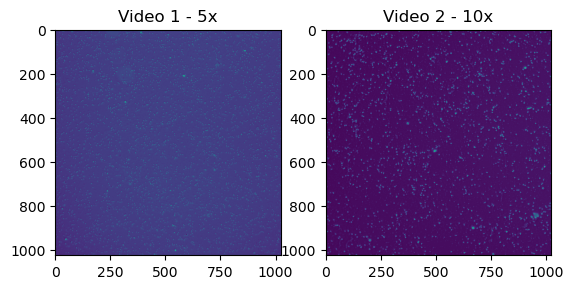

In [52]:
# Visualize the input
cap1 = cv.VideoCapture(video1)
cap2 = cv.VideoCapture(video2)

fps1 = cap1.get(cv.CAP_PROP_FPS)
fps2 = cap2.get(cv.CAP_PROP_FPS)

# Get the first frame
ret1, frame1 = cap1.read()
ret2, frame2 = cap2.read()

# Convert to grayscale
gray1 = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)


# Show frame1
print(gray1.shape)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(gray1)
plt.title('Video 1 - 5x')

# Show frame2
print(gray2.shape)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(gray2)
plt.title('Video 2 - 10x')

plt.show()

                 y            x         mass         size          ecc  \
count  1170.000000  1170.000000  1170.000000  1170.000000  1170.000000   
mean    463.435917   503.281860   247.648537     1.194515     0.244517   
std     289.941882   298.025197    51.201093     0.052540     0.113120   
min       3.761905     2.216288   150.238738     1.066522     0.005382   
25%     214.086036   250.715592   209.923528     1.155913     0.160136   
50%     435.803934   485.015896   247.483213     1.190527     0.238082   
75%     708.178238   758.888457   286.169026     1.231190     0.326385   
max    1021.334808  1020.857558   442.502104     1.375620     0.606775   

            signal     raw_mass           ep  
count  1170.000000  1170.000000  1170.000000  
mean     41.826968  1445.523077     0.009571  
std      10.871590   268.690615     0.002038  
min      18.018050   825.000000     0.004654  
25%      33.121415  1265.000000     0.008208  
50%      41.600497  1439.000000     0.009204  
75% 

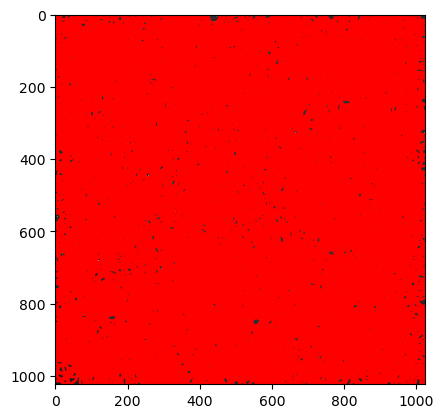

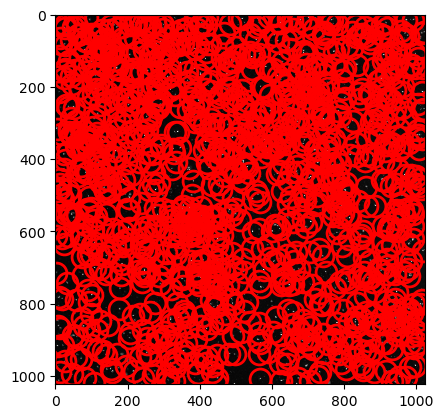

<Axes: >

In [53]:
f1 = tp.locate(gray1, diameter=5, minmass=50, maxsize=5)
f2 = tp.locate(gray2, diameter=5, minmass=150, maxsize=5)
#f = tracker.determineCentroids_morphology(np.expand_dims(frame,0))

#print(f.head())

print(f2.describe())

# Visualize
tp.annotate(f1, gray1)
tp.annotate(f2, gray2)

In [54]:
def generate_histogram(data, title, xlabel):
    plt.figure()
    plt.hist(data, bins='auto', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [55]:
def summarize_stats(csvfile):
    """
    Summarize the VAP statistics from a CSV file.

    Parameters:
    csvfile (str): Path to the CSV file containing sperm tracking data with a column "VAP".

    """
    try:
        # Load the data from the CSV file
        data = pd.read_csv(csvfile)
    except (FileNotFoundError, pd.errors.EmptyDataError, pd.errors.ParserError) as e:
        print(f"Error loading CSV file: {e}")
        return
     # Check if 'VAP' and 'VCL' columns exist
    if 'VAP' not in data.columns or 'VCL' not in data.columns:
        print("Error: The CSV file does not contain 'VAP' and 'VCL' columns.")
        return

    # Extract VAP and VCL values
    vaps = data['VAP'].dropna()  # Drop any NaN values
    vcls = data['VCL'].dropna()  # Drop any NaN values

    if vaps.empty or vcls.empty:
        print("No VAP or VCL data available in the CSV file.")
        return

    # Get sperm density from csv file
    sperm_num = data['sperm']
    density = np.max(sperm_num)
    
    # Calculate mean and range for VAP
    mean_vap = np.mean(vaps)
    range_vap = (np.min(vaps), np.max(vaps))

    # Calculate mean and range for VCL
    mean_vcl = np.mean(vcls)
    range_vcl = (np.min(vcls), np.max(vcls))

    # Print summary
    print("Summary of VAP and VCL Statistics:     "+ csvfile)
    print(f"Cell Density: {density}")
    print(f"Average Path Velocity (VAP):")
    print(f"  Mean: {mean_vap:.2f}")
    print(f"  Range: {range_vap[0]:.2f} - {range_vap[1]:.2f}")
    print(f"Curvilinear Velocity (VCL):")
    print(f"  Mean: {mean_vcl:.2f}")
    print(f"  Range: {range_vcl[0]:.2f} - {range_vcl[1]:.2f}")


  # Generate histograms
    generate_histogram(vaps, "Average Path Velocity (VAP)", "VAP (microns/second)")
    generate_histogram(vcls, "Curilinear Velocity (VCL)", "VCL (microns/second)")

Summary of VAP and VCL Statistics:     5X_ph_9fps_R1.csv
Cell Density: 39377
Average Path Velocity (VAP):
  Mean: 10.14
  Range: 0.17 - 24.65
Curvilinear Velocity (VCL):
  Mean: 10.35
  Range: 0.24 - 24.71


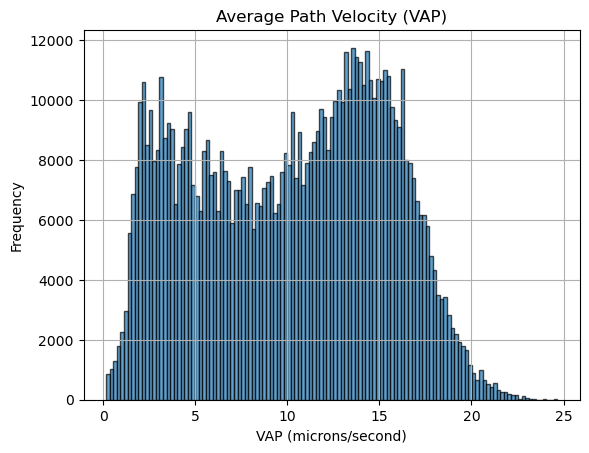

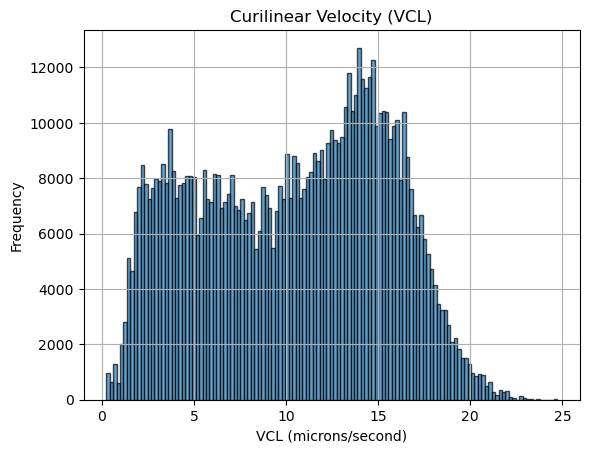

Summary of VAP and VCL Statistics:     10X_-ph_9fps_Raw_R1.csv
Cell Density: 31127
Average Path Velocity (VAP):
  Mean: 12.52
  Range: 0.20 - 55.12
Curvilinear Velocity (VCL):
  Mean: 12.77
  Range: 0.21 - 55.11


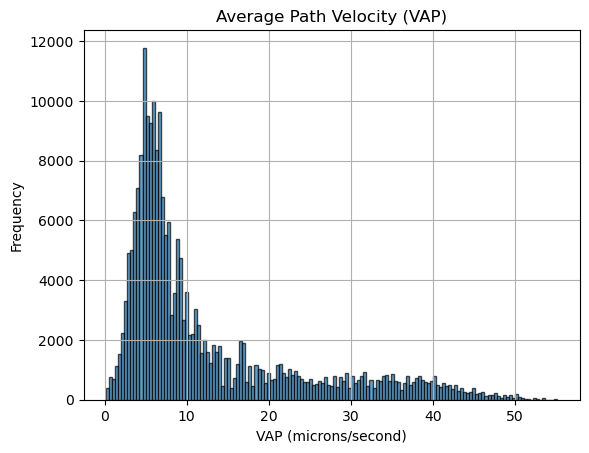

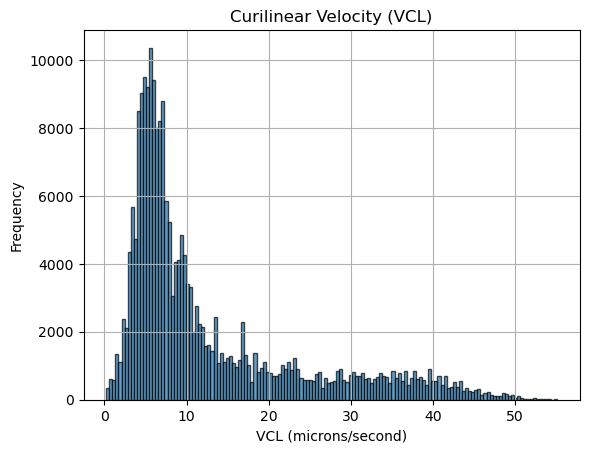

Summary of VAP and VCL Statistics:     10X_HD_R5.csv
Cell Density: 1427
Average Path Velocity (VAP):
  Mean: 3.28
  Range: 0.12 - 20.14
Curvilinear Velocity (VCL):
  Mean: 3.28
  Range: 0.12 - 17.92


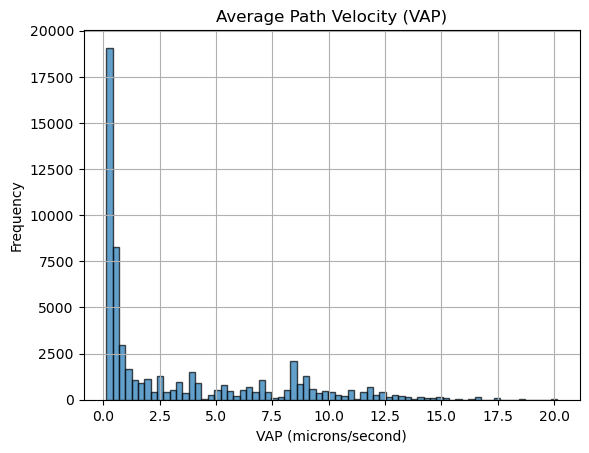

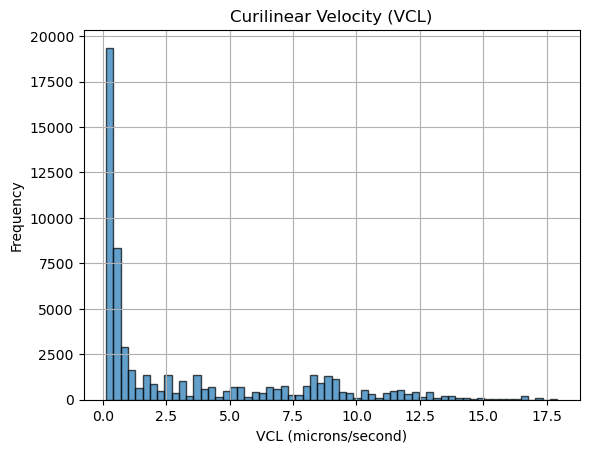

In [56]:
summarize_stats(video1[:-4] + '.csv')
summarize_stats(video2[:-4] + '.csv')